In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [22]:
(xtrain, ytrain),(xtest, ytest) = datasets.cifar10.load_data()

In [3]:
print(xtrain.shape)

(50000, 32, 32, 3)


In [4]:
xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

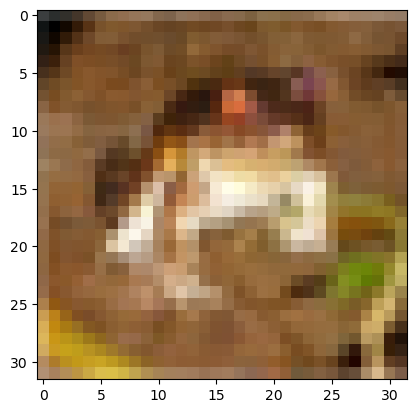

In [5]:
plt.imshow(xtrain[0])

# how to plot multiple images at one time?

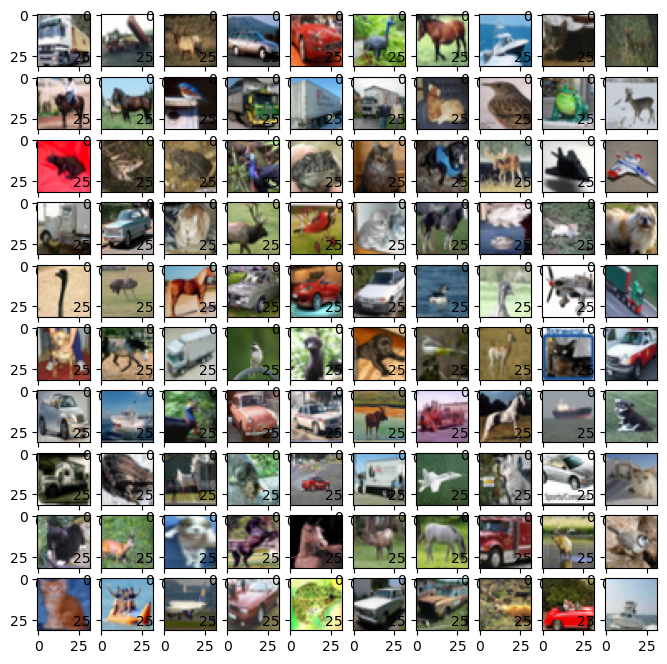

In [6]:
figure=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1,columns*rows+1):
    img=xtrain[i]
    figure.add_subplot(columns,rows,i)
    plt.imshow(img)
plt.show()

In [7]:
print(xtest.shape)

(10000, 32, 32, 3)


In [8]:
xtest[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

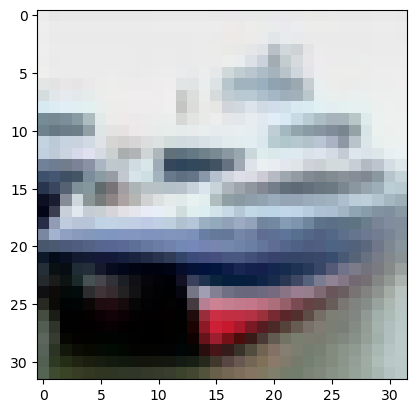

In [9]:
plt.imshow(xtest[1])

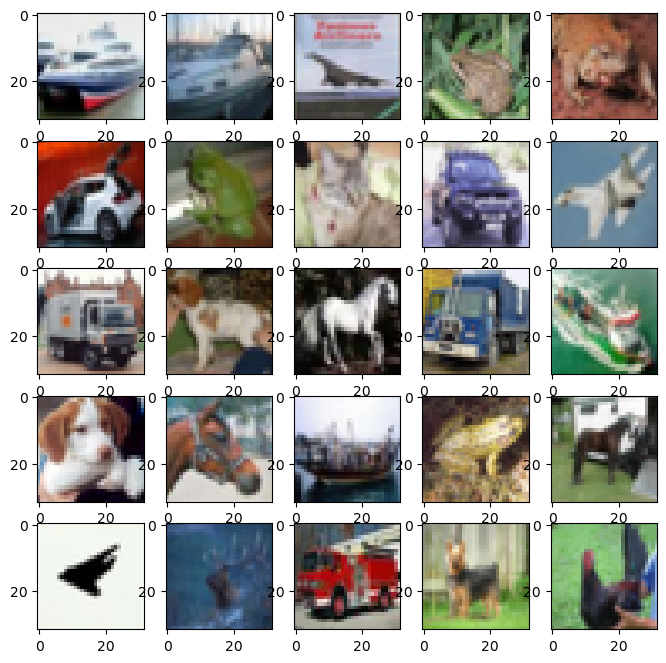

In [10]:
figure=plt.figure(figsize=(8,8))
columns=5
rows=5
for i in range(1,columns*rows+1):
    img=xtest[i]
    figure.add_subplot(columns,rows,i)
    plt.imshow(img)
plt.show()

In [11]:
print(ytrain.shape)

(50000, 1)


In [12]:
ytrain

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
print(ytest.shape)

(10000, 1)


In [14]:
ytest

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [25]:
[xtrain,xtest]=[xtrain/255,xtest/255]
xtest[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [26]:
model=models.Sequential([
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(48,activation='relu'),
    layers.Dense(24,activation='relu'),
    layers.Dense(10,activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )


model.fit(xtrain,ytrain,epochs=3)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 55ms/step - accuracy: 0.3036 - loss: 1.8451
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 50ms/step - accuracy: 0.5492 - loss: 1.2611
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.6153 - loss: 1.0846


In [27]:
score=model.evaluate(xtest,ytest)
score

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6423 - loss: 1.0095


[1.0166372060775757, 0.6446999907493591]

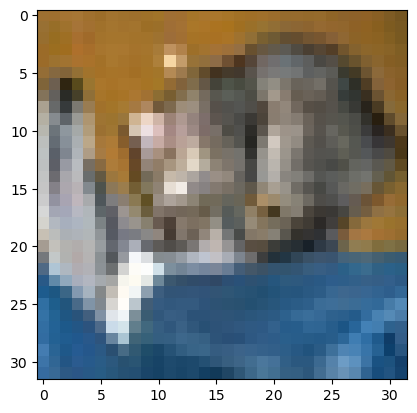

In [28]:
plt.imshow(xtest[0])

In [29]:
ytest[0]

array([3], dtype=uint8)

In [40]:
ypredicted=model.predict(xtest)
ypredicted

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


array([[1.6582215e-03, 1.8999388e-03, 1.8874230e-02, ..., 8.0022495e-03,
        2.6804941e-02, 7.6376465e-03],
       [2.1442987e-01, 2.3865850e-01, 1.1385509e-03, ..., 2.6785003e-04,
        5.2838564e-01, 1.5302017e-02],
       [7.7049874e-02, 4.8539612e-01, 2.0560706e-02, ..., 1.0961860e-02,
        1.1767500e-01, 2.6090327e-01],
       ...,
       [7.7193452e-04, 5.3828635e-04, 1.2689161e-01, ..., 8.4608398e-02,
        6.1583956e-04, 2.0212599e-03],
       [1.5475324e-01, 3.0013138e-01, 6.4220324e-02, ..., 2.8715920e-02,
        2.2937240e-02, 1.8591376e-02],
       [1.5213367e-05, 3.2178411e-06, 1.3943648e-03, ..., 8.8548559e-01,
        2.2937218e-05, 5.0330204e-06]], dtype=float32)

In [41]:
ypredicted=[np.argmax(i) for i in ypredicted]
ypredicted

[3,
 8,
 1,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 4,
 9,
 3,
 7,
 9,
 6,
 3,
 3,
 8,
 6,
 7,
 0,
 2,
 9,
 4,
 4,
 4,
 2,
 7,
 6,
 6,
 5,
 4,
 3,
 9,
 3,
 4,
 1,
 9,
 5,
 0,
 6,
 5,
 6,
 0,
 9,
 3,
 3,
 7,
 6,
 9,
 0,
 2,
 3,
 0,
 8,
 7,
 3,
 3,
 2,
 7,
 3,
 3,
 3,
 6,
 6,
 1,
 0,
 3,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 0,
 3,
 3,
 8,
 8,
 8,
 1,
 7,
 2,
 7,
 2,
 4,
 9,
 9,
 0,
 4,
 8,
 6,
 4,
 6,
 6,
 8,
 0,
 7,
 4,
 7,
 6,
 3,
 1,
 1,
 2,
 6,
 3,
 5,
 3,
 0,
 6,
 2,
 1,
 7,
 0,
 7,
 6,
 3,
 8,
 2,
 1,
 2,
 8,
 2,
 0,
 3,
 3,
 0,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 4,
 5,
 3,
 5,
 8,
 4,
 3,
 5,
 5,
 5,
 0,
 9,
 6,
 3,
 0,
 5,
 2,
 9,
 5,
 4,
 0,
 1,
 3,
 6,
 8,
 4,
 8,
 4,
 3,
 0,
 9,
 6,
 9,
 0,
 9,
 9,
 3,
 7,
 3,
 9,
 3,
 5,
 6,
 3,
 3,
 8,
 6,
 3,
 7,
 8,
 6,
 8,
 7,
 1,
 7,
 4,
 8,
 3,
 3,
 8,
 3,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 3,
 0,
 3,
 7,
 8,
 2,
 4,
 9,
 8,
 7,
 7,
 3,
 9,
 2,
 3,
 9,
 3,
 4,
 3,
 2,
 5,
 1,
 3,
 1,
 8,
 0,
 4,
 0,
 3,
 3,
 1,
 1,
 8,
 9,
 4,
 6,
 1,
 0,
 2,
 0,


In [42]:
confusion_matrix=tf.math.confusion_matrix(labels=ytest,predictions=ypredicted)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[669,  34,  85,  33,  30,   4,  12,  36,  57,  40],
       [ 38, 772,  13,  18,   2,   5,  11,  10,  18, 113],
       [ 68,   3, 493,  93, 115,  83,  81,  42,  10,  12],
       [ 14,  10,  67, 572,  73, 119,  72,  47,   8,  18],
       [ 23,   3,  85,  82, 555,  25,  94, 115,  15,   3],
       [  9,   5,  67, 299,  46, 469,  21,  76,   2,   6],
       [  7,   4,  46, 105,  40,  12, 762,  16,   1,   7],
       [ 11,   3,  31,  85,  72,  49,  11, 721,   0,  17],
       [136,  46,  18,  40,  11,   5,   6,   9, 688,  41],
       [ 39, 103,  16,  27,   6,   5,  17,  23,  18, 746]])>

Text(95.72222222222221, 0.5, 'True_value')

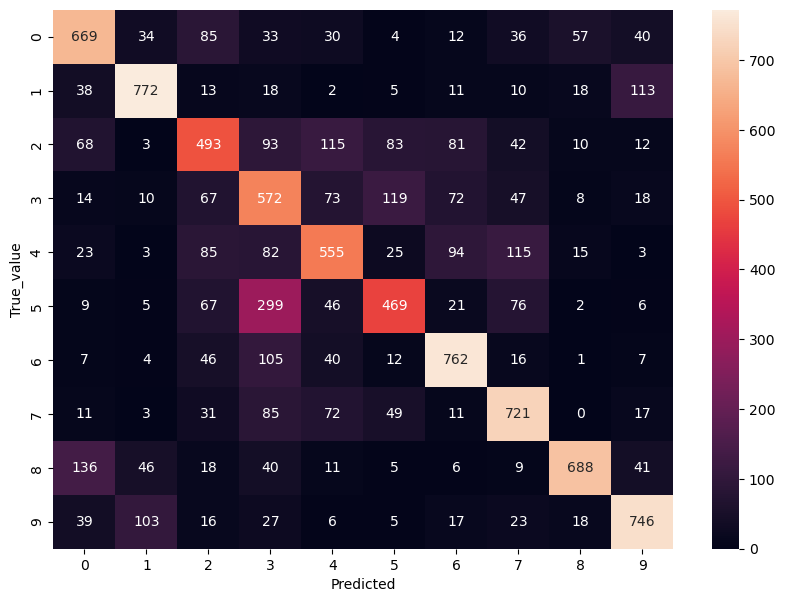

In [45]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True_value')

# CNN for detecting hand written digit

In [47]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [48]:
xtrain.shape

(60000, 28, 28)

In [49]:
xtest.shape

(10000, 28, 28)

In [50]:
ytrain.shape

(60000,)

In [51]:
ytest.shape

(10000,)

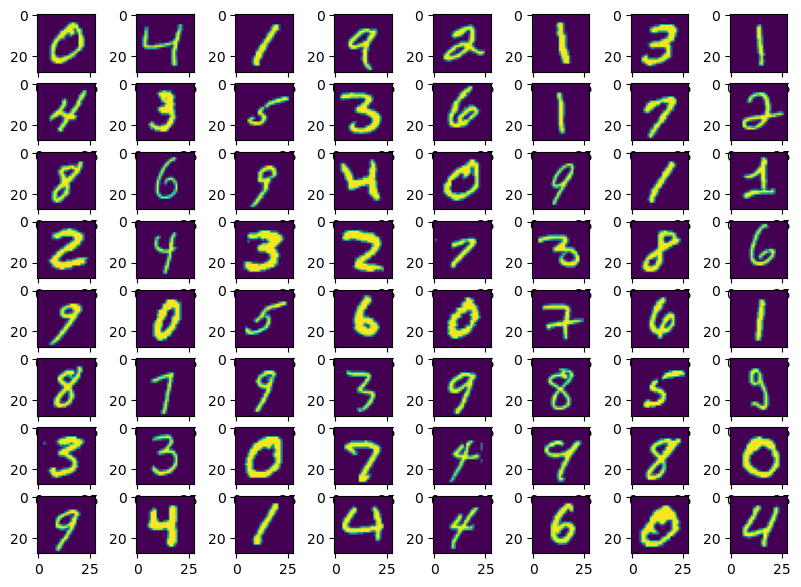

In [63]:
figure=plt.figure(figsize=(10,7))
columns=8
rows=8
for i in range(1,columns*rows+1):
    image=xtrain[i]
    figure.add_subplot(rows,columns,i)
    plt.imshow(image)
plt.show()

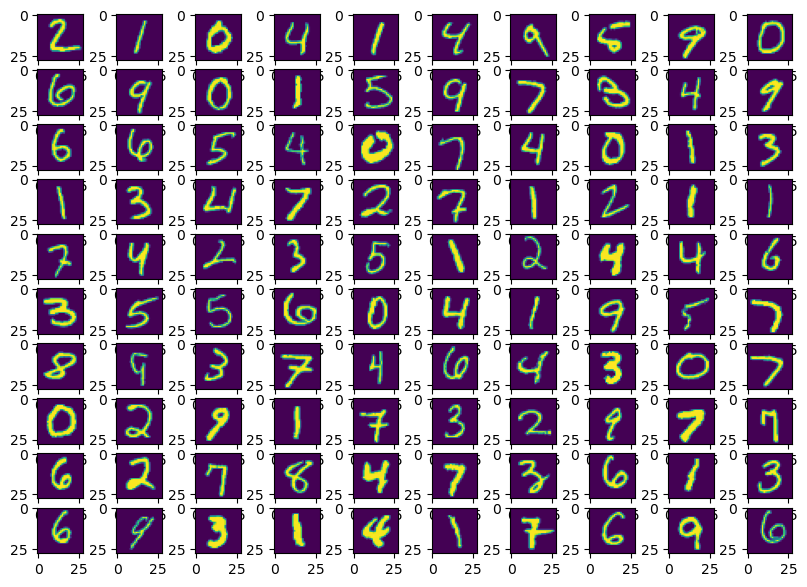

In [64]:
figure=plt.figure(figsize=(10,7))
rows=10
columns=10
for i in range(1,rows*columns+1):
    image=xtest[i]
    figure.add_subplot(rows,columns,i)
    plt.imshow(image)
plt.show()

In [85]:
handwritten=models.Sequential([
    layers.Conv2D(filters=28,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(16,activation='relu'),
    layers.Dense(10,activation='softmax')
])
handwritten.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
handwritten.fit(xtrain,ytrain,epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.7878 - loss: 1.0879
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9654 - loss: 0.1163
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9740 - loss: 0.0847
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9795 - loss: 0.0677
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9816 - loss: 0.0577
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9850 - loss: 0.0502
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9869 - loss: 0.0439
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9878 - loss: 0.0393
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9895 - loss: 0.0343
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9909 - loss: 0.0288
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9924 - loss: 0.0250
Epoch 12

In [86]:
score=handwritten.evaluate(xtest,ytest)
score

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9792 - loss: 0.1075


[0.08494872599840164, 0.9835000038146973]

In [87]:
ypredicted=handwritten.predict(xtest)
ypredicted

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[1.91420664e-13, 3.66461670e-08, 9.80214736e-07, ...,
        9.99998808e-01, 9.88704008e-10, 3.07796917e-08],
       [2.74740302e-08, 4.36145129e-08, 1.00000000e+00, ...,
        2.44521542e-10, 9.80425630e-10, 1.11785242e-13],
       [3.95652180e-13, 1.00000000e+00, 1.50179012e-12, ...,
        1.12433942e-14, 2.93772651e-09, 2.34683035e-15],
       ...,
       [8.61963428e-20, 5.76135743e-19, 5.66047266e-26, ...,
        1.20978655e-17, 5.38278156e-14, 1.28998686e-13],
       [1.05922927e-14, 4.02579767e-15, 4.21505498e-17, ...,
        6.00393379e-13, 2.03481984e-15, 2.21995079e-12],
       [8.23574958e-11, 4.71826761e-14, 1.86402935e-10, ...,
        2.38307690e-16, 8.07347189e-10, 7.29516816e-13]], dtype=float32)

In [88]:
ypredicted =[np.argmax(i) for i in ypredicted]
ypredicted

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 8,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


In [90]:
ytest[1]

2

In [93]:
conf_mat=tf.math.confusion_matrix(ytest,ypredicted)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    1,    2,    0,    3,    1,    3,    2,    0,    1],
       [   0, 1130,    2,    0,    0,    0,    1,    1,    1,    0],
       [   1,    1, 1012,    2,    0,    2,    2,   11,    0,    1],
       [   0,    2,    4,  999,    0,    2,    0,    1,    1,    1],
       [   1,    0,    0,    0,  970,    0,    2,    0,    2,    7],
       [   2,    1,    1,    5,    0,  869,    4,    2,    7,    1],
       [   4,    3,    0,    0,    1,    3,  946,    0,    1,    0],
       [   2,   10,   16,    2,    0,    1,    0,  991,    2,    4],
       [   1,    1,    2,    2,    1,    2,    1,    0,  962,    2],
       [   4,    1,    1,    1,    5,    3,    0,    3,    2,  989]])>

Text(95.72222222222221, 0.5, 'True value')

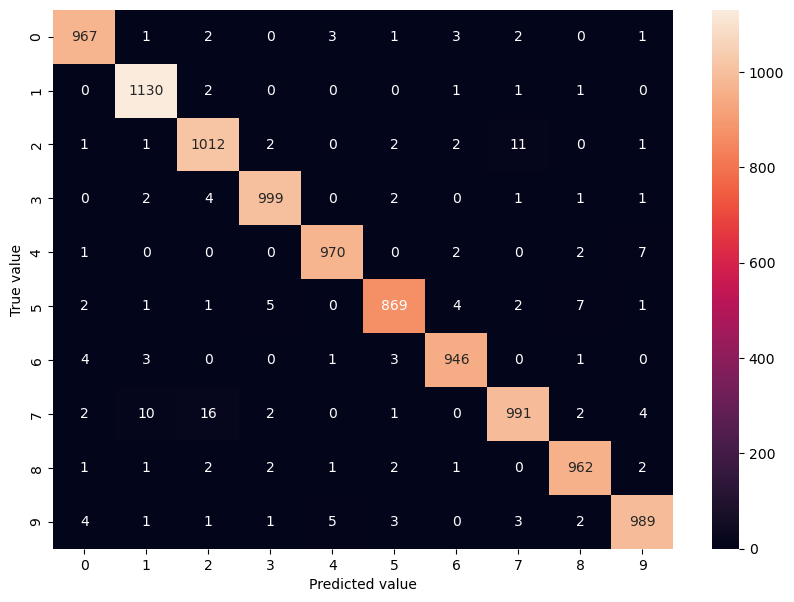

In [94]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('True value')